In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.applications import VGG16

train_dir = 'dataset/tarp3/'

batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.4
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
)

# Create the model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg_model.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)


Found 186 images belonging to 2 classes.
Found 123 images belonging to 2 classes.
Epoch 1/10
5/5 [==============================] - 22s 5s/step - loss: 2.3092 - accuracy: 0.5844 - val_loss: 1.0093 - val_accuracy: 0.4688
Epoch 2/10
5/5 [==============================] - 21s 4s/step - loss: 0.8029 - accuracy: 0.7532 - val_loss: 0.6707 - val_accuracy: 0.7500
Epoch 3/10
5/5 [==============================] - 22s 5s/step - loss: 0.5290 - accuracy: 0.8377 - val_loss: 0.6062 - val_accuracy: 0.7396
Epoch 4/10
5/5 [==============================] - 22s 5s/step - loss: 0.2981 - accuracy: 0.9156 - val_loss: 0.6383 - val_accuracy: 0.7083
Epoch 5/10
5/5 [==============================] - 22s 4s/step - loss: 0.4127 - accuracy: 0.8896 - val_loss: 0.6187 - val_accuracy: 0.7083
Epoch 6/10
5/5 [==============================] - 22s 5s/step - loss: 0.2667 - accuracy: 0.8766 - val_loss: 0.7228 - val_accuracy: 0.7083
Epoch 7/10
5/5 [==============================] - 22s 5s/step - loss: 0.2219 - accuracy: 0

In [ ]:
# save the model to disk
model.save('models/my_model_final_10.h5')

In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image
import keras
from keras.models import load_model
model = load_model('models/Functional/my_model_3.h5')
def predict_class(image_path):

    # load the image for prediction
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.

    # make the prediction
    preds = model.predict(x)
    if preds[0] > 0.85:
        return "Not Danger"
    else:
        return 'Danger'
predict_class("dataset/test/sumit2424.jpg")

1/1 [==============================] - 0s 158ms/step


'Danger'

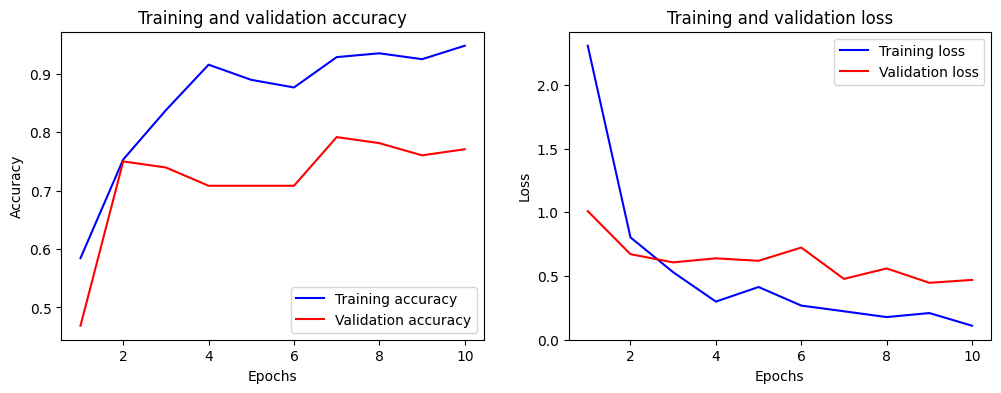

In [3]:
import matplotlib.pyplot as plt

# Get the accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Plot the accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the loss curves
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
